In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Data/marketing_customer_analysis.csv")
df.head(3)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A


In [4]:
#Show the DataFrame's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       10910 non-null  object 
 1   State                          10279 non-null  object 
 2   Customer Lifetime Value        10910 non-null  float64
 3   Response                       10279 non-null  object 
 4   Coverage                       10910 non-null  object 
 5   Education                      10910 non-null  object 
 6   Effective To Date              10910 non-null  object 
 7   EmploymentStatus               10910 non-null  object 
 8   Gender                         10910 non-null  object 
 9   Income                         10910 non-null  int64  
 10  Location Code                  10910 non-null  object 
 11  Marital Status                 10910 non-null  object 
 12  Monthly Premium Auto           10910 non-null 

In [5]:
#Describe the DataFrame
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [ ]:
df.drop(columns=["Unnamed: 0"], inplace=True) #La elimino ya que no aporta información relevante.

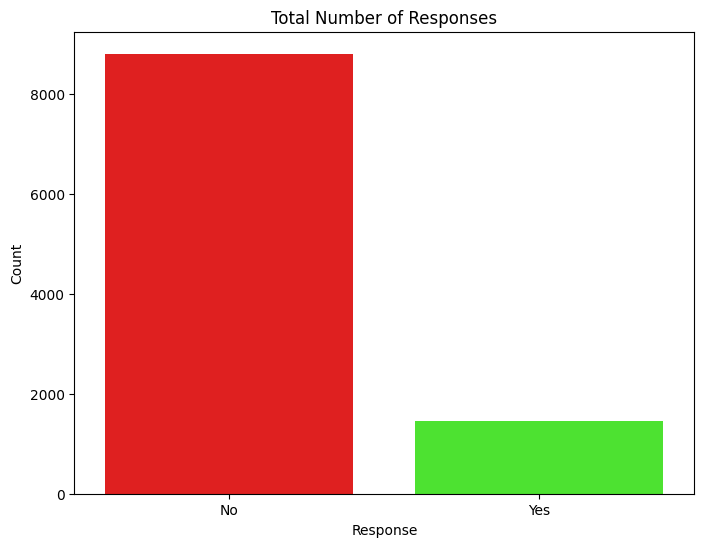

In [6]:
#Show a plot of the total number of responses
colores=["#FF0000", "#39FF14"] 
plt.figure(figsize=(8, 6))
sns.countplot(x="Response", hue="Response", data=df, palette=colores, legend=False)
plt.title("Total Number of Responses")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

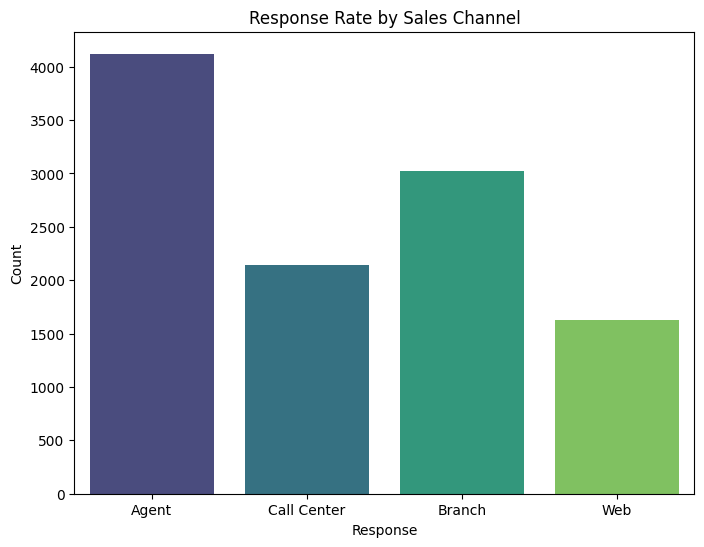

In [26]:
#Show a plot of the response rate by the sales channel
plt.figure(figsize=(8, 6))
sns.countplot(x="Sales Channel", hue="Sales Channel", data=df, palette="viridis")
plt.title("Response Rate by Sales Channel")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

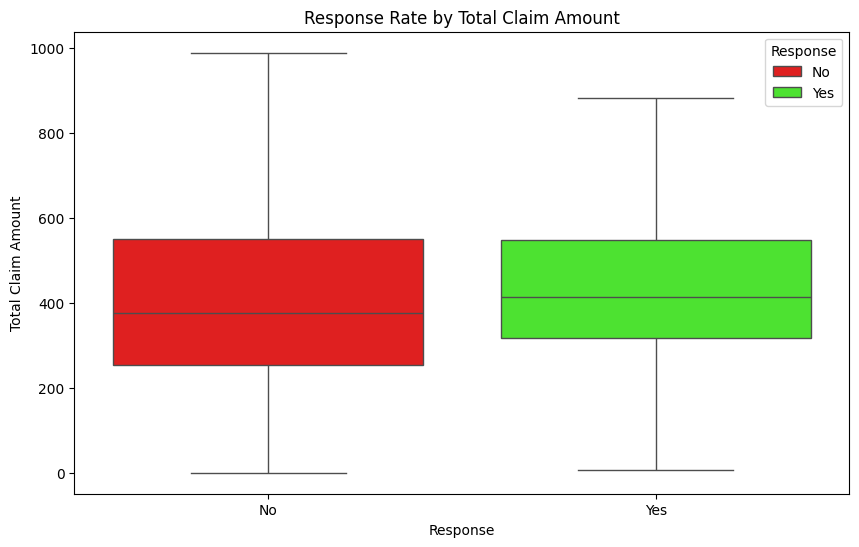

In [8]:
#Show a plot of the response rate by the total claim amount
colores=["#FF0000", "#39FF14"]
plt.figure(figsize=(10, 6))
sns.boxplot(x="Response", y="Total Claim Amount", hue="Response", data=df, palette=colores, showfliers=False) 
#Oculté los outliers por un tema estético, pero para incluirlos alcanza con quitar el showfliers=False
plt.title("Response Rate by Total Claim Amount")
plt.xlabel("Response")
plt.ylabel("Total Claim Amount")
plt.show()

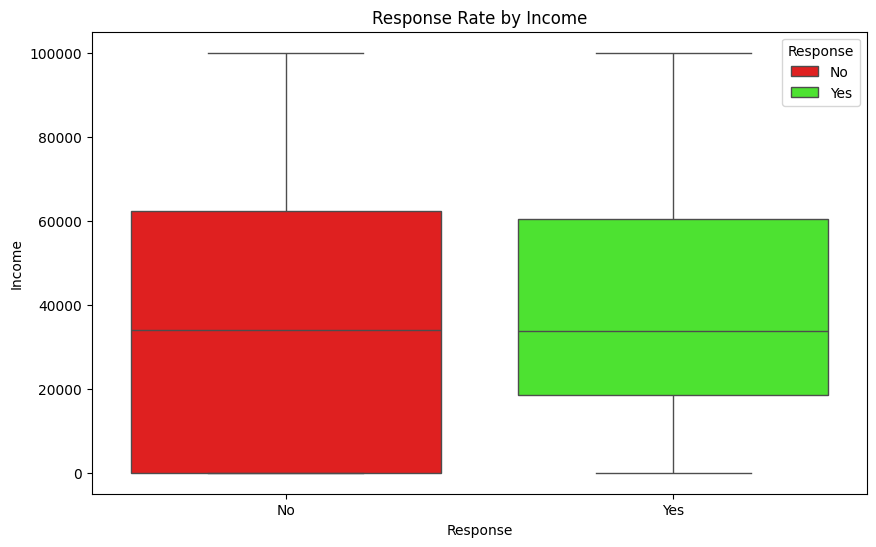

In [9]:
#Show a plot of the response rate by income
colores=["#FF0000", "#39FF14"]
plt.figure(figsize=(10, 6))
sns.boxplot(x="Response", y="Income", hue="Response", data=df, palette=colores) 
plt.title("Response Rate by Income")
plt.xlabel("Response")
plt.ylabel("Income")
plt.show()

#### Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
#### (You can use np.number and np.object to select the numerical data types and categorical data types respectively)


In [48]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Vehicle Type    

In [11]:
numerical=df.select_dtypes(include=np.number)
numerical.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [12]:
categorical=df.select_dtypes(object)
categorical.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

#### Now we will try to check the distributions of the numerical variables visually

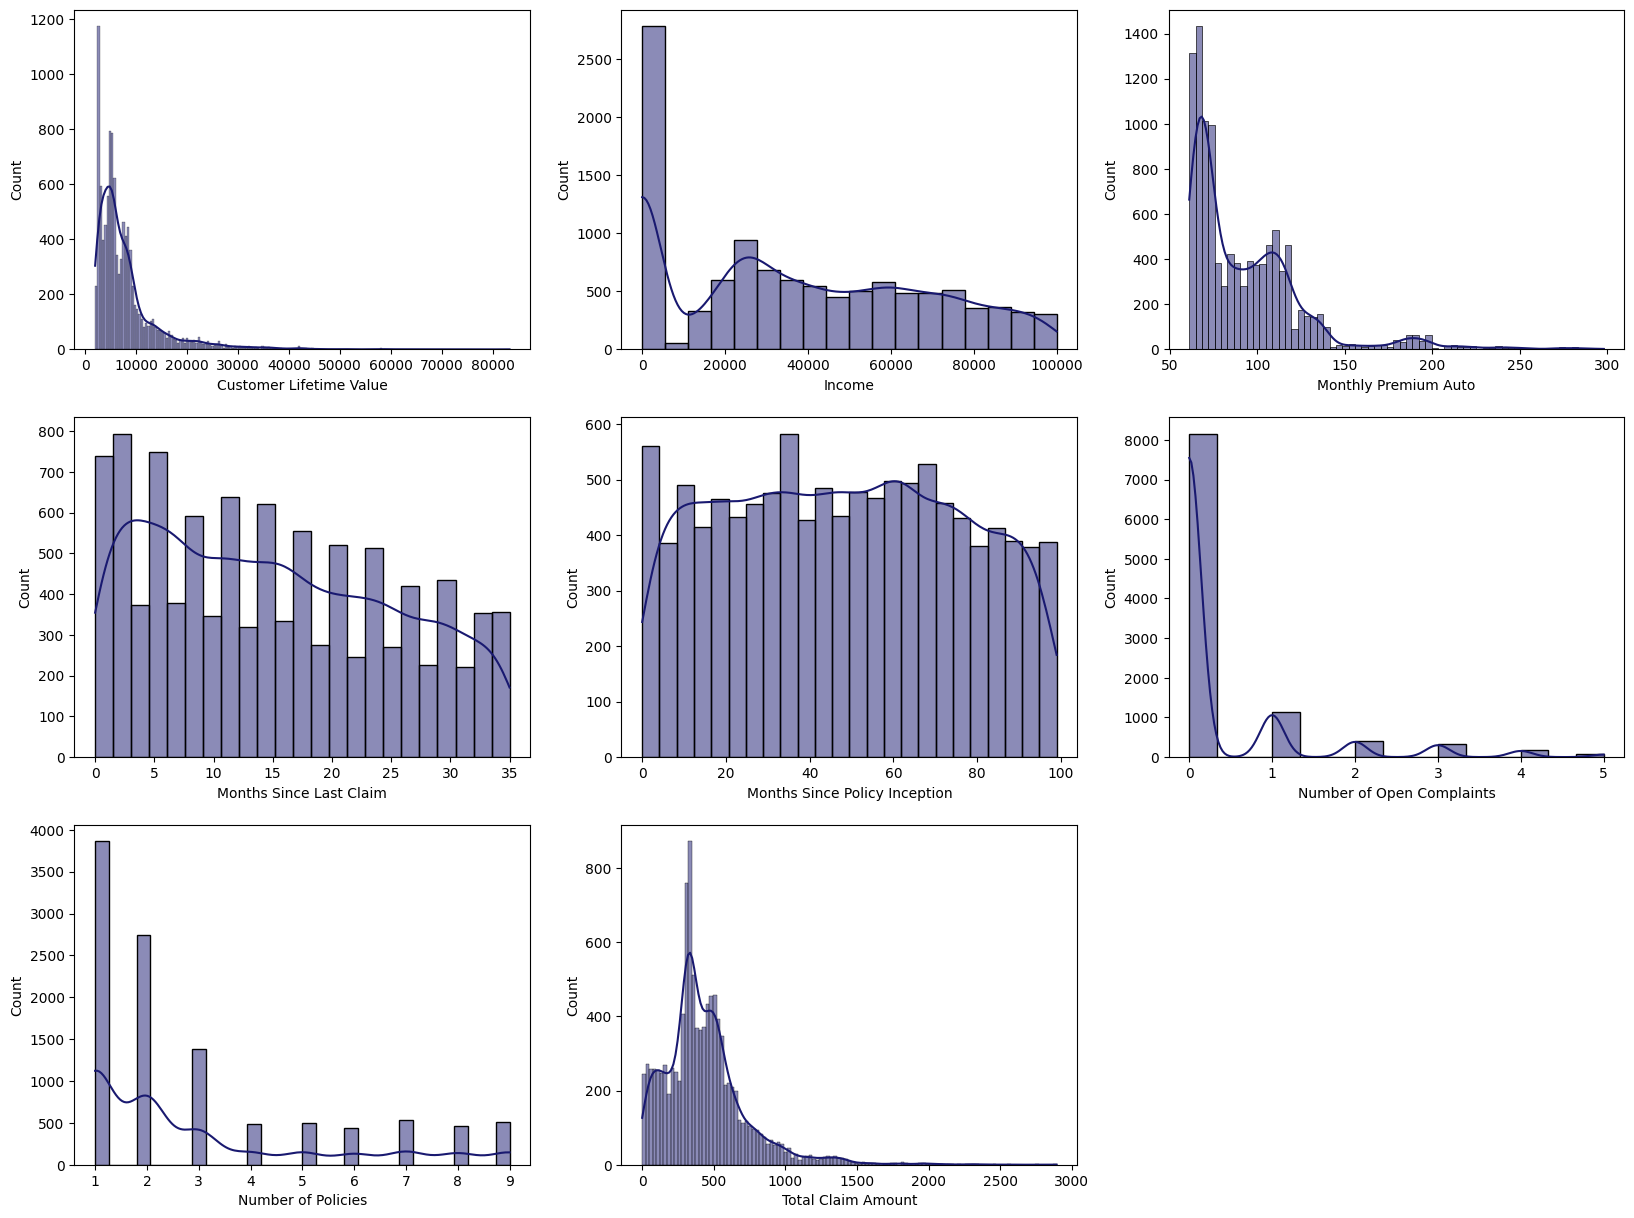

In [47]:
# 1) Use seaborn library to construct distribution plots for the numerical variables
color_="midnightblue"
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
sns.histplot(numerical["Customer Lifetime Value"], kde=True, ax=axs[0,0], color=color_)
sns.histplot(numerical["Income"], kde=True,  ax=axs[0,1], color=color_)
sns.histplot(numerical["Monthly Premium Auto"], kde=True, ax=axs[0,2], color=color_)
sns.histplot(numerical["Months Since Last Claim"], kde=True, ax=axs[1,0], color=color_)
sns.histplot(numerical["Months Since Policy Inception"], kde=True, ax=axs[1,1], color=color_)
sns.histplot(numerical["Number of Open Complaints"], kde=True, ax=axs[1,2], color=color_)
sns.histplot(numerical["Number of Policies"], kde=True, ax=axs[2,0], color=color_)
sns.histplot(numerical["Total Claim Amount"], kde=True, ax=axs[2,1], color=color_)

fig.delaxes(axs[2, 2]) #Eliminar el subplot vacío
plt.show()

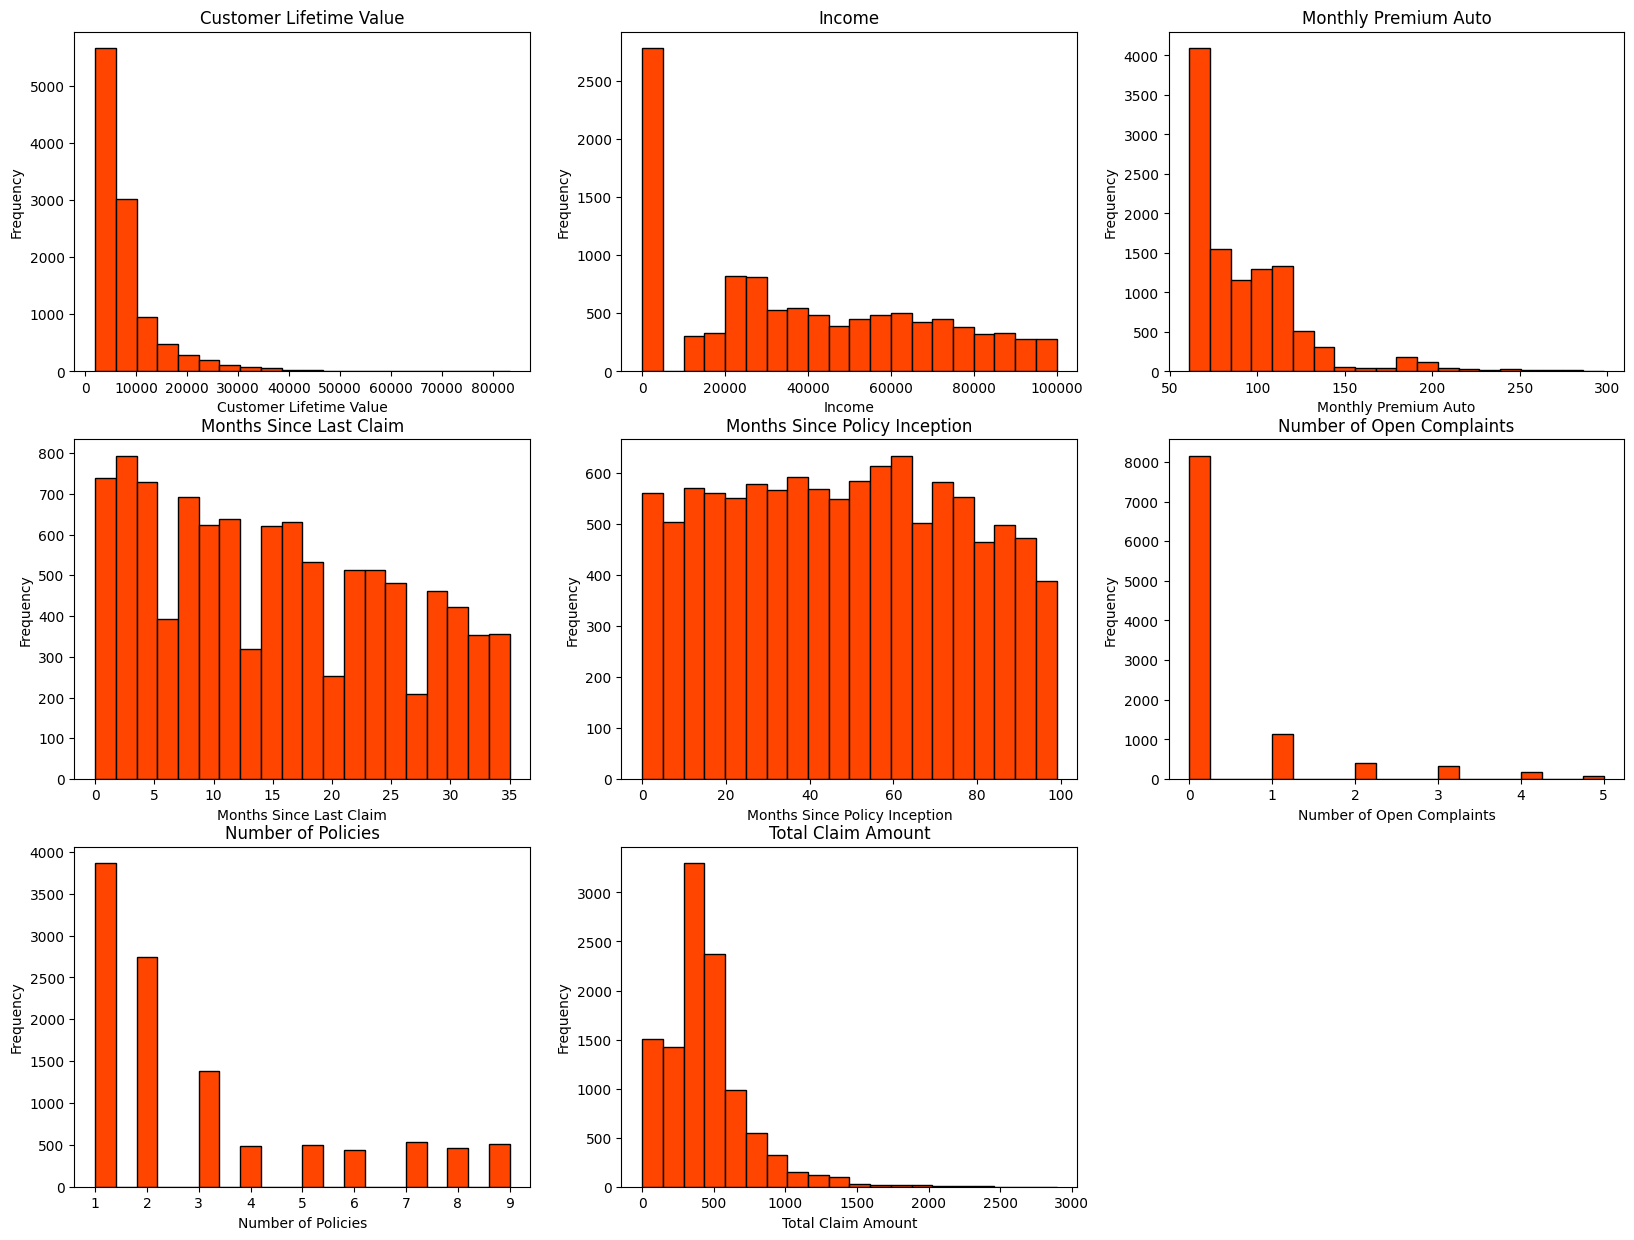

In [37]:
# 2) Use Matplotlib to construct histograms
fig, axs=plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axs[0, 0].hist(numerical["Customer Lifetime Value"], bins=20, color='orangered', edgecolor='black')
axs[0, 0].set_title("Customer Lifetime Value")
axs[0, 0].set_xlabel("Customer Lifetime Value")
axs[0, 0].set_ylabel("Frequency")

axs[0, 1].hist(numerical["Income"], bins=20, color='orangered', edgecolor='black')
axs[0, 1].set_title("Income")
axs[0, 1].set_xlabel("Income")
axs[0, 1].set_ylabel("Frequency")

axs[0, 2].hist(numerical["Monthly Premium Auto"], bins=20, color='orangered', edgecolor='black')
axs[0, 2].set_title("Monthly Premium Auto")
axs[0, 2].set_xlabel("Monthly Premium Auto")
axs[0, 2].set_ylabel("Frequency")

axs[1, 0].hist(numerical["Months Since Last Claim"], bins=20, color='orangered', edgecolor='black')
axs[1, 0].set_title("Months Since Last Claim")
axs[1, 0].set_xlabel("Months Since Last Claim")
axs[1, 0].set_ylabel("Frequency")

axs[1, 1].hist(numerical["Months Since Policy Inception"], bins=20, color='orangered', edgecolor='black')
axs[1, 1].set_title("Months Since Policy Inception")
axs[1, 1].set_xlabel("Months Since Policy Inception")
axs[1, 1].set_ylabel("Frequency")

axs[1, 2].hist(numerical["Number of Open Complaints"], bins=20, color='orangered', edgecolor='black')
axs[1, 2].set_title("Number of Open Complaints")
axs[1, 2].set_xlabel("Number of Open Complaints")
axs[1, 2].set_ylabel("Frequency")

axs[2, 0].hist(numerical["Number of Policies"], bins=20, color='orangered', edgecolor='black')
axs[2, 0].set_title("Number of Policies")
axs[2, 0].set_xlabel("Number of Policies")
axs[2, 0].set_ylabel("Frequency")

axs[2, 1].hist(numerical["Total Claim Amount"], bins=20, color='orangered', edgecolor='black')
axs[2, 1].set_title("Total Claim Amount")
axs[2, 1].set_xlabel("Total Claim Amount")
axs[2, 1].set_ylabel("Frequency")

fig.delaxes(axs[2, 2]) # Eliminar el subplot vacío
plt.show()
#Posiblemente se pueda hacer el código en forma más corta usando un loop, pero quise hacerlo en forma similar a la parte anterior (seaborn)

#### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
#### Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features.

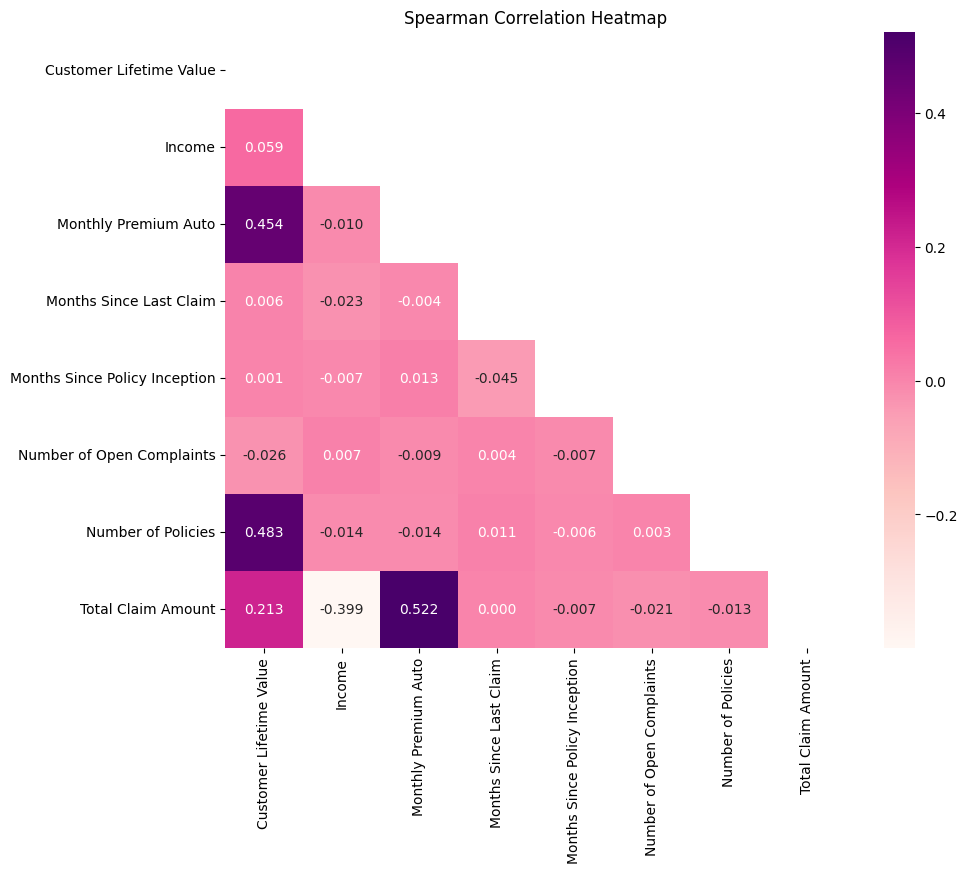

In [15]:
correlation_matrix=numerical.corr(method="spearman")
mask=np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdPu", fmt=".3f", mask=mask)
plt.title("Spearman Correlation Heatmap")
plt.show()

#Opté por usar la correlación de Spearman, porque la correlación de Pearson sufre en gran medida por outliers además de que no hay relación lineal entre variables (en el Heatmap se ve que las correlaciones son bajas, es decir son lejos de ser lineales)ni distribuciones normales en este caso.

In [16]:
numerical.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626
Income,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141
Monthly Premium Auto,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799
Months Since Last Claim,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137
Months Since Policy Inception,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095
Number of Open Complaints,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379
Number of Policies,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923
Total Claim Amount,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000
